### Dataset: https://www.kaggle.com/ealaxi/banksim1?select=bsNET140513_032310.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('bs140513_032310.csv')

In [3]:
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [5]:
df.nunique()

step             180
customer        4112
age                8
gender             4
zipcodeOri         1
merchant          50
zipMerchant        1
category          15
amount         23767
fraud              2
dtype: int64

In [6]:
df['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

In [7]:
df.tail(10)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
594633,179,'C1039390058','4','M','28007','M45060432','28007','es_hotelservices',190.31,0
594634,179,'C728039227','6','M','28007','M348934600','28007','es_transportation',27.93,0
594635,179,'C728039227','6','M','28007','M1823072687','28007','es_transportation',30.04,0
594636,179,'C1904086644','5','F','28007','M1823072687','28007','es_transportation',28.93,0
594637,179,'C748358246','2','M','28007','M1823072687','28007','es_transportation',51.17,0
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0
594642,179,'C616528518','4','F','28007','M1823072687','28007','es_transportation',26.93,0


In [8]:
df['age'].value_counts()

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64

In [9]:
df['gender'].value_counts()

'F'    324565
'M'    268385
'E'      1178
'U'       515
Name: gender, dtype: int64

#### Step: Step Ranges from 0 to 179 where 0 standas fro day 1 and 179 stands for 180th day
#### Customer: It refres to Customer Id the data set has 4112 unique customer
#### Age: Category of age group where 
  * 0: <= 18 Years,
  * 1: = 19-25,
  * 2: = 26-35,
  * 3: = 36-45,
  * 4: = 46-55,
  * 5: = 56-65,
  * 6: = Above 65
  * U: = Unknown
#### Gender: Gender of the customer
#### ZipcodeOri: Zipcode of customer
#### Merchant: Refers to Merchent Id there are total 50 unique merchants.
#### ZipMerchant: Zipcode of Merchant. The zipcode of all customer and The zipcode of all merchant is same
#### Category: Category of purchase, There total 15 cateogry
#### Amount: Amount spent on Purchase
#### Fraud: The Transection was fraud or not.
### There are total 594642 Transetions in which only 7200 was fraud.

In [10]:
df_fraud = df[df['fraud']==1]

In [11]:
df_non_fraud = df[df['fraud']==0]

In [12]:
df_fraud.describe()

,step,amount,fraud
count,7200.000000,7200.000000,7200.0
mean,89.500000,530.926551,1.0
std,51.964331,835.587112,0.0
min,0.000000,0.030000,1.0
25%,44.750000,159.980000,1.0
50%,89.500000,319.175000,1.0
75%,134.250000,548.977500,1.0
max,179.000000,8329.960000,1.0


In [13]:
df_non_fraud.describe()

,step,amount,fraud
count,587443.000000,587443.000000,587443.0
mean,95.054077,31.847230,0.0
std,51.038755,31.470876,0.0
min,0.000000,0.000000,0.0
25%,52.000000,13.590000,0.0
50%,97.000000,26.610000,0.0
75%,139.000000,41.895000,0.0
max,179.000000,2144.860000,0.0


#### The mean price of fraud Transection is Heigher than Non_fraud Transection

In [14]:
category_wise_fraud = df.groupby('category')['amount','fraud'].mean().sort_values('fraud', ascending=False)

C:\Users\rishi\AppData\Local\Temp/ipykernel_10848/2341263384.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  category_wise_fraud = df.groupby('category')['amount','fraud'].mean().sort_values('fraud', ascending=False)


In [15]:
category_wise_fraud.reset_index(inplace=True)

In [16]:
category_wise_fraud

,category,amount,fraud
0,'es_leisure',288.911303,0.949900
1,'es_travel',2250.409190,0.793956
2,'es_sportsandtoys',215.715280,0.495252
3,'es_hotelservices',205.614249,0.314220
4,'es_otherservices',135.881524,0.250000
5,'es_home',165.670846,0.152064
6,'es_health',135.621367,0.105126
7,'es_tech',120.947937,0.066667
8,'es_wellnessandbeauty',65.511221,0.047594
9,'es_hyper',45.970421,0.045917


In [17]:
count_by_category = pd.DataFrame(df['category'].value_counts())

In [18]:
count_by_category.reset_index(inplace=True)

In [19]:
count_by_category = count_by_category.rename(columns={'index':'category', 'category':'count'})
count_by_category

,category,count
0,'es_transportation',505119
1,'es_food',26254
2,'es_health',16133
3,'es_wellnessandbeauty',15086
4,'es_fashion',6454
5,'es_barsandrestaurants',6373
6,'es_hyper',6098
7,'es_sportsandtoys',4002
8,'es_tech',2370
9,'es_home',1986


In [20]:
category_wise_fraud = pd.merge(category_wise_fraud, count_by_category, on='category')

In [21]:
category_wise_fraud

,category,amount,fraud,count
0,'es_leisure',288.911303,0.949900,499
1,'es_travel',2250.409190,0.793956,728
2,'es_sportsandtoys',215.715280,0.495252,4002
3,'es_hotelservices',205.614249,0.314220,1744
4,'es_otherservices',135.881524,0.250000,912
5,'es_home',165.670846,0.152064,1986
6,'es_health',135.621367,0.105126,16133
7,'es_tech',120.947937,0.066667,2370
8,'es_wellnessandbeauty',65.511221,0.047594,15086
9,'es_hyper',45.970421,0.045917,6098


1. Leisure category is highly suspected there are total 499 Transection falls in this category in which more than 94% of its transections are fraud.
2. Travel holds the 2nd Position more than 74% of its transections are fraud.
3. Transportaion, Food and Contents is cleanest acrooss the category, They do not have any fraud Transection.
4. Most of the payments lies in above 3 categories.

No handles with labels found to put in legend.


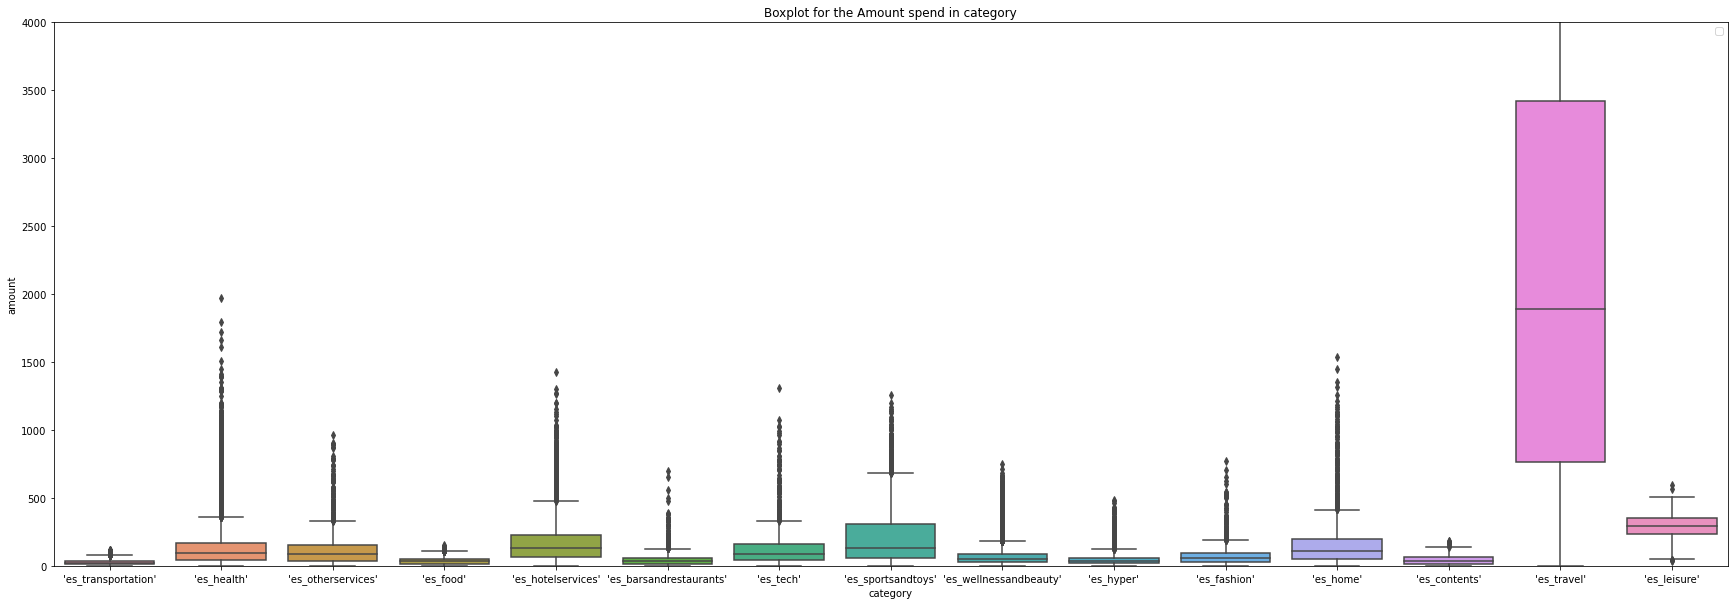

In [22]:
plt.figure(figsize=(30,10))
sns.boxplot(x=df.category,y=df.amount)
plt.title("Boxplot for the Amount spend in category")
plt.ylim(0,4000)
plt.legend()
plt.show()

In [23]:
# Total Amount
df['amount'].sum()

22531103.730000004

In [24]:
# Total Transection in Travel cateogry
2250.409190 * 728

1638297.89032

In [25]:
# Fraud Transection in Travel Category
1638297.89032 * 0.793956 

1300736.4398069058

In [26]:
# Total Fraud Transection Made by Travel
print('Percent of Fraud Transection Made by Travel Over Total Transection:', (1300736.4398069058 / 22531103.730000004) * 100)

Percent of Fraud Transection Made by Travel Over Total Transection: 5.773070220590146


In [27]:
df.groupby('age')['fraud'].mean()*100

age
'0'    1.957586
'1'    1.185254
'2'    1.251401
'3'    1.192815
'4'    1.293281
'5'    1.095112
'6'    0.974826
'U'    0.594228
Name: fraud, dtype: float64

 Fraud occurs more in age group of 0-18 (0th category). Fraudster are really young or they think that it would be less consiqential if they show their age younger.

In [28]:
# Both The Zipcodes are Same therefor we are dropping the zipcode columns
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','28007','M1823072687','28007','es_transportation',20.53,0
594639,179,'C650108285','4','F','28007','M1823072687','28007','es_transportation',50.73,0
594640,179,'C123623130','2','F','28007','M349281107','28007','es_fashion',22.44,0
594641,179,'C1499363341','5','M','28007','M1823072687','28007','es_transportation',14.46,0


In [29]:
df.drop(['zipcodeOri', 'zipMerchant'], axis=1, inplace=True)

In [30]:
df

,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...
594638,179,'C1753498738','3','F','M1823072687','es_transportation',20.53,0
594639,179,'C650108285','4','F','M1823072687','es_transportation',50.73,0
594640,179,'C123623130','2','F','M349281107','es_fashion',22.44,0
594641,179,'C1499363341','5','M','M1823072687','es_transportation',14.46,0


In [31]:
df.dtypes

step          int64
customer     object
age          object
gender       object
merchant     object
category     object
amount      float64
fraud         int64
dtype: object

In [32]:
def transform(data):
    for i in data.columns:
        if data[i].dtypes != 'object':
            pass
        else:
            data[i] = data[i].astype('category')
            data[i] = data[i].cat.codes
    return data            

In [33]:
transform(df)

,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0
...,...,...,...,...,...,...,...,...
594638,179,1639,3,1,18,12,20.53,0
594639,179,3369,4,1,18,12,50.73,0
594640,179,529,2,1,31,2,22.44,0
594641,179,1083,5,2,18,12,14.46,0


In [34]:
y = df['fraud']
x = df.drop('fraud',axis=1)

In [35]:
y[y==1].sum()

7200

In [36]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x, y)

In [37]:
pd.DataFrame(y_res).value_counts()

fraud
0        587443
1        587443
dtype: int64

Now Both The classes are equal

In [38]:
X_res.head(2)

,step,customer,age,gender,merchant,category,amount
0,0,210,4,2,30,12,4.55
1,0,2753,2,2,30,12,39.68


In [39]:
X_res['step'].nunique(), X_res['customer'].nunique()

(180, 4112)

In [40]:
X_res1 = X_res.copy()

In [41]:
# Dropping The Step and Customer columns
X_res1.drop(['step','customer'], axis = 1, inplace =True)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X_res1, y_res, test_size=0.2, random_state=1)

### Approach 1 Logistic Regression

In [43]:
lr = LogisticRegression()

In [44]:
lr.fit(x_train, y_train)

LogisticRegression()

In [45]:
lr_pred = lr.predict(x_train)

In [46]:
accuracy_score(y_train, lr_pred)

0.9217040391187222

In [47]:
accuracy_score(y_test, lr.predict(x_test))

0.9219203499902119

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_train, lr_pred)

array([[445960,  23961],
       [ 49630, 420357]], dtype=int64)

In [50]:
confusion_matrix(y_test, lr.predict(x_test))

array([[111446,   6076],
       [ 12271, 105185]], dtype=int64)

### Approach2: K nearest neighbours

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
kn = KNeighborsClassifier(n_neighbors=4)

In [53]:
kn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [54]:
kn_score = kn.predict(x_train)

In [55]:
confusion_matrix(y_train, kn_score)

array([[466081,   3840],
       [  4325, 465662]], dtype=int64)

In [56]:
kn.score(x_test, y_test)

0.9859816663687664

In [57]:
confusion_matrix(y_test, kn.predict(x_test))

array([[115863,   1659],
       [  1635, 115821]], dtype=int64)

In [58]:
accuracy_score(y_test, kn.predict(x_test))

0.9859816663687664

In [59]:
from sklearn.metrics import roc_auc_score

In [60]:
roc_auc_score(y_train,kn_score)

0.9913130157592711

In [61]:
roc_auc_score(y_test, kn.predict(x_test))

0.985981693950866

In [62]:
x_train.columns

Index(['age', 'gender', 'merchant', 'category', 'amount'], dtype='object')

### Approach3 Ann using Class Weights

In [63]:
df1 = pd.read_csv('bs140513_032310.csv')

In [64]:
transform(df1)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,210,4,2,0,30,0,12,4.55,0
1,0,2753,2,2,0,30,0,12,39.68,0
2,0,2285,4,1,0,18,0,12,26.89,0
3,0,1650,3,2,0,30,0,12,17.25,0
4,0,3585,5,2,0,30,0,12,35.72,0
...,...,...,...,...,...,...,...,...,...,...
594638,179,1639,3,1,0,18,0,12,20.53,0
594639,179,3369,4,1,0,18,0,12,50.73,0
594640,179,529,2,1,0,31,0,2,22.44,0
594641,179,1083,5,2,0,18,0,12,14.46,0


In [65]:
y1 = df1['fraud']
x1 = df1.drop('fraud', axis=1)

In [66]:
x1.drop(['zipcodeOri','zipMerchant','step','customer'], axis=1, inplace=True)

In [67]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=54)

In [68]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [69]:
len(x1_train.columns)

5

In [70]:
df1['fraud'].value_counts()

0    587443
1      7200
Name: fraud, dtype: int64

In [71]:
int(587443/7200)

81

In [72]:
# Class 1 is 81 time bigger than class 0
class_weights = {0:1, 1:81}

In [73]:
import os
callback = tf.keras.callbacks.ModelCheckpoint(filepath = os.getcwd(), monitor='loss', save_best_only =True )

In [75]:
model = Sequential()
model.add(Dense(50, input_dim=5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(30, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(30, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(15, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
history = model.fit(x1_train,
                    y1_train,
                    batch_size=500, 
                    class_weight= class_weights, 
                    epochs=100, 
                    callbacks= callback,
                    validation_split=0.2)

Epoch 1/100
762/762 [==============================] - 6s 7ms/step - loss: 0.5143 - accuracy: 0.9254 - val_loss: 0.1135 - val_accuracy: 0.9515
Epoch 2/100
762/762 [==============================] - 6s 8ms/step - loss: 0.3390 - accuracy: 0.9405 - val_loss: 0.1669 - val_accuracy: 0.9294
Epoch 3/100
762/762 [==============================] - 6s 8ms/step - loss: 0.3023 - accuracy: 0.9423 - val_loss: 0.1408 - val_accuracy: 0.9458
Epoch 4/100
762/762 [==============================] - 4s 6ms/step - loss: 0.5608 - accuracy: 0.9141 - val_loss: 0.1551 - val_accuracy: 0.9389
Epoch 5/100
762/762 [==============================] - 4s 5ms/step - loss: 0.3153 - accuracy: 0.9416 - val_loss: 0.1725 - val_accuracy: 0.9399
Epoch 6/100
762/762 [==============================] - 4s 5ms/step - loss: 0.3510 - accuracy: 0.9364 - val_loss: 0.3299 - val_accuracy: 0.9523
Epoch 7/100
762/762 [==============================] - 4s 5ms/step - loss: 0.3309 - accuracy: 0.9375 - val_loss: 0.1156 - val_accuracy: 0.9470

762/762 [==============================] - 4s 5ms/step - loss: 0.2966 - accuracy: 0.9442 - val_loss: 0.1388 - val_accuracy: 0.9421
Epoch 43/100
762/762 [==============================] - 4s 5ms/step - loss: 0.2396 - accuracy: 0.9472 - val_loss: 0.1207 - val_accuracy: 0.9462
Epoch 44/100
762/762 [==============================] - 5s 7ms/step - loss: 0.2342 - accuracy: 0.9471 - val_loss: 0.1145 - val_accuracy: 0.9489
Epoch 45/100
762/762 [==============================] - 5s 7ms/step - loss: 0.2247 - accuracy: 0.9479 - val_loss: 0.1241 - val_accuracy: 0.9493
Epoch 46/100
762/762 [==============================] - 5s 7ms/step - loss: 0.2222 - accuracy: 0.9504 - val_loss: 0.1106 - val_accuracy: 0.9533
Epoch 47/100
762/762 [==============================] - 4s 5ms/step - loss: 0.2284 - accuracy: 0.9491 - val_loss: 0.1152 - val_accuracy: 0.9519
Epoch 48/100
762/762 [==============================] - 4s 5ms/step - loss: 0.2287 - accuracy: 0.9515 - val_loss: 0.1137 - val_accuracy: 0.9509
Epoch

Epoch 87/100
762/762 [==============================] - 4s 6ms/step - loss: 0.2167 - accuracy: 0.9489 - val_loss: 0.1043 - val_accuracy: 0.9550
Epoch 88/100
762/762 [==============================] - 4s 5ms/step - loss: 0.2017 - accuracy: 0.9519 - val_loss: 0.1147 - val_accuracy: 0.9547
Epoch 89/100
762/762 [==============================] - 4s 5ms/step - loss: 0.2055 - accuracy: 0.9506 - val_loss: 0.1094 - val_accuracy: 0.9530
Epoch 90/100
762/762 [==============================] - 4s 5ms/step - loss: 0.2127 - accuracy: 0.9481 - val_loss: 0.1497 - val_accuracy: 0.9446
Epoch 91/100
762/762 [==============================] - 4s 5ms/step - loss: 0.2272 - accuracy: 0.9496 - val_loss: 0.1276 - val_accuracy: 0.9515
Epoch 92/100
762/762 [==============================] - 4s 5ms/step - loss: 0.2096 - accuracy: 0.9516 - val_loss: 0.1240 - val_accuracy: 0.9457
Epoch 93/100
762/762 [==============================] - 4s 5ms/step - loss: 0.2052 - accuracy: 0.9494 - val_loss: 0.1114 - val_accuracy:

In [76]:
model.load_weights(os.getcwd())

In [77]:
ann_score = model.predict(x1_train)

In [82]:
x1_train.sample()

,age,gender,merchant,category,amount
53207,5,2,18,12,11.63


In [78]:
type(ann_score)

numpy.ndarray

In [101]:
np.min(ann_score)

0.0

In [79]:
roc_auc_score(y1_train, ann_score)

0.9939008385804012

In [83]:
model1 = tf.keras.models.load_model('Ann.h5')

In [164]:
roc_auc_score(y1_test, model.predict(x1_test))

0.9947954203436837

In [188]:
x1_train[:1].values

array([[ 6.  ,  2.  , 18.  , 12.  , 82.04]])

In [92]:
w= model.predict([[ 6.  ,  2.  , 18.  , 12.  , 9.04]])

In [95]:
w[0][0]

0.0051414073

### Approach4: Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB

In [139]:
nb = GaussianNB()

In [140]:
nb.fit(x_train, y_train)

GaussianNB()

In [141]:
nb.score(x_train,y_train)

0.9135138758261447

In [142]:
nb.score(x_test, y_test)

0.9141579211670879

In [143]:
accuracy_score(y_train, nb.predict(x_train))

0.9135138758261447

In [144]:
accuracy_score(y_test, nb.predict(x_test))

0.9141579211670879

In [145]:
confusion_matrix(y_test, nb.predict(x_test))

array([[108752,   8770],
       [ 11401, 106055]], dtype=int64)

### Approach6: Decission Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [122]:
tree = DecisionTreeClassifier(min_samples_split=20)

In [123]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

In [124]:
tree.score(x_train,y_train)

0.9943015699408878

In [125]:
tree.score(x_test, y_test)

0.9887053256049503

In [126]:
confusion_matrix(y_train, tree.predict(x_train))

array([[466969,   2952],
       [  2404, 467583]], dtype=int64)

In [127]:
confusion_matrix(y_test, tree.predict(x_test))

array([[116147,   1375],
       [  1279, 116177]], dtype=int64)

In [128]:
accuracy_score(y_test, tree.predict(x_test))

0.9887053256049503

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [129]:
rf = RandomForestClassifier(n_estimators=10, min_samples_split=20)

In [130]:
rf.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=20, n_estimators=10)

In [131]:
rf.score(x_train, y_train)

0.9934961719657669

In [132]:
rf.score(x_test, y_test)

0.9902288724901905

In [133]:
confusion_matrix(y_test, rf.predict(x_test))

array([[116043,   1479],
       [   817, 116639]], dtype=int64)

In [171]:
roc_auc_score(y_test, rf.predict(x_test))

0.990229663030964

In [134]:
confusion_matrix(y_train, rf.predict(x_train))

array([[465755,   4166],
       [  1947, 468040]], dtype=int64)

In [168]:
rf.predict(x_train)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [135]:
rf.feature_importances_

array([0.00492365, 0.00949559, 0.21072341, 0.36175801, 0.41309934])

In [175]:
#Ann with class Weights Has perfomed best therfor we are using Ann
model.save('Ann.h5')

In [35]:
import pickle
#pickle.dump(tree, open('tree.pkl','wb'))

In [36]:
model = pickle.load(open('tree.pkl','rb'))

In [39]:
x1 = x.drop(['step','customer'], axis=1)

In [40]:
x1

,age,gender,merchant,category,amount
0,4,2,30,12,4.55
1,2,2,30,12,39.68
2,4,1,18,12,26.89
3,3,2,30,12,17.25
4,5,2,30,12,35.72
...,...,...,...,...,...
594638,3,1,18,12,20.53
594639,4,1,18,12,50.73
594640,2,1,31,2,22.44
594641,5,2,18,12,14.46


In [43]:
x1[:1]

,age,gender,merchant,category,amount
0,4,2,30,12,4.55


In [45]:
[x1['age'][0], x1['gender'][0], x1['merchant'][0], x1['category'][0], 

4

In [44]:
model.predict(x1[:1])

array([0], dtype=int64)